  0%|          | 0/50000 [00:00<?, ?it/s]

100%|██████████| 50000/50000 [41:27<00:00, 20.10it/s]  


********Average reward per thousand episodes********

1000 :  11185.997368421056
2000 :  12440.681578947368
3000 :  13174.068421052636
4000 :  13545.078947368385
5000 :  13832.513157894715
6000 :  13968.213157894716
7000 :  13974.907894736816
8000 :  14308.526315789459
9000 :  14103.744736842098
10000 :  14203.989473684216
11000 :  13955.757894736835
12000 :  14158.015789473684
13000 :  14245.160526315805
14000 :  14302.099999999993
15000 :  14102.41315789472
16000 :  14164.468421052614
17000 :  14175.66842105263
18000 :  14229.57368421052
19000 :  14162.644736842096
20000 :  14049.334210526307
21000 :  14243.68947368421
22000 :  14208.831578947353
23000 :  14140.744736842094
24000 :  14353.184210526319
25000 :  14257.352631578913
26000 :  14181.039473684203
27000 :  13982.828947368404
28000 :  14333.26315789473
29000 :  14210.718421052616
30000 :  14108.84210526315
31000 :  14132.357894736828
32000 :  14215.957894736832
33000 :  14247.889473684198
34000 :  14058.965789473663
35000 :  

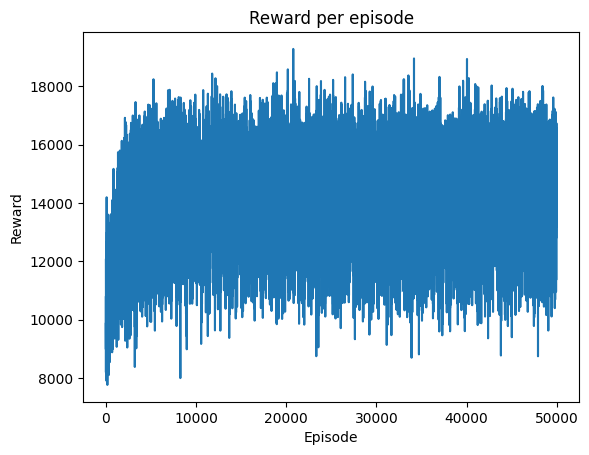

In [7]:
import numpy as np
import gym
from gym import spaces
from tqdm import tqdm
import matplotlib.pyplot as plt

def winprob(a):
    return 1/(1+np.exp(-3+3*a))

def stateTransition(s, win, lead, distance): 
    if win:
        return lead + 2 * distance
    return max(s - 1, 0)

class ShippingEnv(gym.Env):
    def __init__(self):
        super(ShippingEnv, self).__init__()

        self.lead = 15
        self.distance = 20
        self.w = 100
        self.T = 1000
        self.Arrivalprob = 0.3
        self.actions = np.linspace(0.5, 2, 20)

        self.observation_space = spaces.Discrete(self.lead + 2 * self.distance + 1)
        self.action_space = spaces.Discrete(len(self.actions))

        self.state = np.random.randint(0, self.observation_space.n)
        self.time = 0

    def step(self, action):
        assert self.action_space.contains(action)

        self.time += 1

        offer_received = np.random.rand() < self.Arrivalprob
        win = np.random.rand() < winprob(self.actions[action])

        # If an offer is received, and the agent accepts it (action > 0), calculate reward and update state
        if offer_received and action > 0:
            self.state = stateTransition(self.state, win, self.lead, self.distance)
            reward = win * self.actions[action] * self.w
        else:
            self.state = max(self.state - 1, 0)
            reward = 0

        done = self.time == self.T

        return np.array(self.state).reshape((1, 1)), reward, done, {}

    def reset(self):
        self.state = np.random.randint(0, self.observation_space.n)
        self.time = 0
        return np.array(self.state).reshape((1, 1))


# Define Q-Learning parameters
num_episodes = 50000
max_steps_per_episode = 1000
learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

# Initialize the environment
env = ShippingEnv()

# Initialize the Q-table
q_table = np.zeros((env.observation_space.n, env.action_space.n))

# List to hold all rewards
rewards_all_episodes = []

# Q-Learning algorithm
for episode in tqdm(range(num_episodes)):
    state = env.reset()
    state = state[0, 0]  # Getting the actual value from the array

    done = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode): 

        # Exploration-exploitation trade-off
        exploration_rate_threshold = np.random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state,:]) 
        else:
            action = np.random.choice(env.action_space.n) 

        new_state, reward, done, info = env.step(action)
        new_state = new_state[0, 0]  # Getting the actual value from the array

        # Update Q-table for Q(s,a)
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))

        state = new_state
        rewards_current_episode += reward 

        if done == True: 
            break

    # Exploration rate decay
    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
 
    rewards_all_episodes.append(rewards_current_episode)

# Calculate and print the average reward per thousand episodes
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000
print("********Average reward per thousand episodes********\n")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

# Visualize the reward
plt.plot(rewards_all_episodes)
plt.title('Reward per episode')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()


# Base Code

## W can increment only with steps of 1

100%|██████████| 50000/50000 [28:42<00:00, 29.02it/s]


********Average reward per thousand episodes********

1000 :  17057.994921052632
2000 :  19726.2409736842
3000 :  20512.733605263154
4000 :  20960.783526315787
5000 :  21131.93128947369
6000 :  21215.256657894737
7000 :  21102.700710526326
8000 :  21165.897710526304
9000 :  21330.200368421
10000 :  20980.826736842097
11000 :  21133.94728947369
12000 :  21142.115473684215
13000 :  21208.366394736848
14000 :  21102.056131578924
15000 :  21010.35892105265
16000 :  21231.010078947387
17000 :  21117.243499999993
18000 :  21100.82065789476
19000 :  20954.845500000036
20000 :  20715.671263157903
21000 :  21076.916815789453
22000 :  21359.536684210547
23000 :  21142.840368421057
24000 :  20714.47186842106
25000 :  21255.667473684196
26000 :  21122.739736842093
27000 :  21302.047131578973
28000 :  21176.214315789464
29000 :  20813.173684210527
30000 :  21024.935842105275
31000 :  21166.23344736842
32000 :  21276.954736842126
33000 :  21132.255842105264
34000 :  20916.967052631586
35000 :  20627

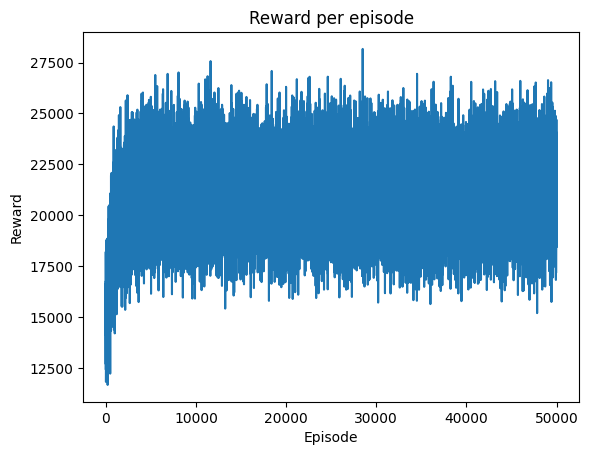

In [1]:
import numpy as np
import gym
from gym import spaces
from tqdm import tqdm
import matplotlib.pyplot as plt

def winprob(a):
    return 1/(1+np.exp(-3+3*a))

def stateTransition(s, win, lead, distance): 
    if win:
        return lead + 2 * distance
    return max(s - 1, 0)

def update_w(w):
    if np.random.rand() < abs(w - 100) / 100.0:
        return w - 1 if w > 100 else w + 1
    else:
        return w + 1 if w > 100 else w - 1

def find_closest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

class ShippingEnv(gym.Env):
    def __init__(self):
        super(ShippingEnv, self).__init__()

        self.lead = 15
        self.distance = 20
        self.w_values = np.arange(50, 200, 1)
        self.w = np.random.choice(self.w_values)
        self.T = 1000
        self.Arrivalprob = 0.3
        self.actions = np.linspace(0.5, 2, 20)

        self.observation_space = spaces.MultiDiscrete([self.lead + 2 * self.distance + 1, len(self.w_values)])
        self.action_space = spaces.Discrete(len(self.actions))

        self.state = (np.random.randint(0, self.observation_space.nvec[0]), np.random.choice(self.observation_space.nvec[1]))
        self.time = 0

    def step(self, action):
        assert self.action_space.contains(action)

        self.time += 1

        offer_received = np.random.rand() < self.Arrivalprob
        win = np.random.rand() < winprob(self.actions[action])

        # Update w
        self.w = update_w(self.w)
        self.w = find_closest(self.w_values, self.w)
        w_index = np.where(self.w_values == self.w)[0][0]

        # If an offer is received, and the agent accepts it (action > 0), calculate reward and update state
        if offer_received and action > 0:
            self.state = (stateTransition(self.state[0], win, self.lead, self.distance), w_index)
            reward = win * self.actions[action] * self.w
        else:
            self.state = (max(self.state[0] - 1, 0), w_index)
            reward = 0

        done = self.time == self.T

        return np.array(self.state), reward, done, {}

    def reset(self):
        self.state = (np.random.randint(0, self.observation_space.nvec[0]), np.random.choice(self.observation_space.nvec[1]))
        self.time = 0
        return np.array(self.state)

# Define Q-Learning parameters
num_episodes = 50000
max_steps_per_episode = 1000
learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

# Initialize the environment
env = ShippingEnv()

# Initialize the Q-table
q_table = np.zeros((env.observation_space.nvec[0], env.observation_space.nvec[1], env.action_space.n))

# List to hold all rewards
rewards_all_episodes = []

# Q-Learning algorithm
for episode in tqdm(range(num_episodes)):
    state = env.reset()

    done = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode): 

        # Exploration-exploitation trade-off
        exploration_rate_threshold = np.random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state[0], state[1], :]) 
        else:
            action = np.random.choice(env.action_space.n) 

        new_state, reward, done, info = env.step(action)

        # Update Q-table for Q(s,a)
        q_table[state[0], state[1], action] = q_table[state[0], state[1], action] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * np.max(q_table[new_state[0], new_state[1], :]))

        state = new_state
        rewards_current_episode += reward 

        if done == True: 
            break

    # Exploration rate decay
    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
 
    rewards_all_episodes.append(rewards_current_episode)

# Calculate and print the average reward per thousand episodes
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000
print("********Average reward per thousand episodes********\n")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

# Visualize the reward
plt.plot(rewards_all_episodes)
plt.title('Reward per episode')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()



## Variable steps for W no bounds

  0%|          | 0/50000 [00:00<?, ?it/s]

100%|██████████| 50000/50000 [53:09<00:00, 15.68it/s]  


********Average reward per thousand episodes********

1000 :  16875.02757894738
2000 :  19466.14460526316
3000 :  20385.23594736841
4000 :  20641.089000000025
5000 :  20643.32418421053
6000 :  20758.869052631573
7000 :  20777.980315789442
8000 :  20821.037500000017
9000 :  20754.783894736876
10000 :  20863.670526315786
11000 :  20770.181710526314
12000 :  20856.85157894736
13000 :  20839.875894736844
14000 :  21031.691868421054
15000 :  20934.135868421068
16000 :  20976.0912105263
17000 :  20963.08681578946
18000 :  21055.213973684233
19000 :  20966.44150000001
20000 :  21038.564657894774
21000 :  20968.277763157897
22000 :  20947.846921052653
23000 :  20995.90284210528
24000 :  20999.19534210525
25000 :  20924.382473684207
26000 :  20873.691105263155
27000 :  21013.945052631603
28000 :  20923.125789473663
29000 :  21078.75726315792
30000 :  20934.978473684216
31000 :  20896.488842105275
32000 :  20914.53692105264
33000 :  21041.05934210525
34000 :  21121.207552631546
35000 :  21033.09

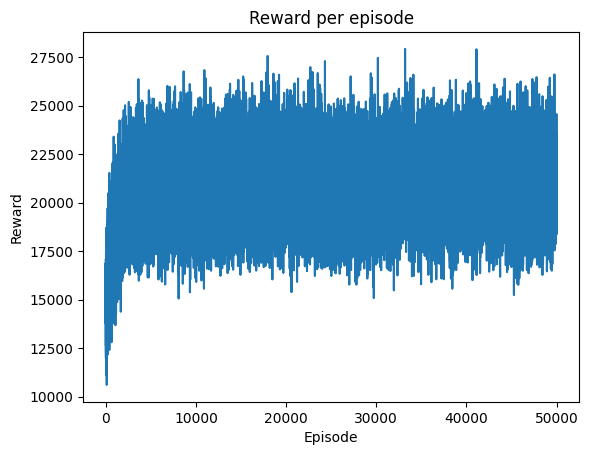

In [6]:
import numpy as np
import gym
from gym import spaces
from tqdm import tqdm
import matplotlib.pyplot as plt

def winprob(a):
    return 1/(1+np.exp(-3+3*a))

def stateTransition(s, win, lead, distance): 
    if win:
        return lead + 2 * distance
    return max(s - 1, 0)

def update_w(w):
    step_sizes = np.array([1, 3, 5])
    probabilities = np.array([0.5, 0.3, 0.2])
    step_size = np.random.choice(step_sizes, p=probabilities)

    if np.random.rand() < abs(w - 100) / 100.0:
        return w - step_size if w > 100 else w + step_size
    else:
        return w + step_size if w > 100 else w - step_size

def find_closest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

class ShippingEnv(gym.Env):
    def __init__(self):
        super(ShippingEnv, self).__init__()

        self.lead = 15
        self.distance = 20
        self.w_values = np.arange(0, 400)
        self.w = np.random.choice(self.w_values)
        self.T = 1000
        self.Arrivalprob = 0.3
        self.actions = np.linspace(0.5, 2, 20)

        self.observation_space = spaces.MultiDiscrete([self.lead + 2 * self.distance + 1, len(self.w_values)])
        self.action_space = spaces.Discrete(len(self.actions))

        self.state = (np.random.randint(0, self.observation_space.nvec[0]), np.random.choice(self.observation_space.nvec[1]))
        self.time = 0

    def step(self, action):
        assert self.action_space.contains(action)

        self.time += 1

        offer_received = np.random.rand() < self.Arrivalprob
        win = np.random.rand() < winprob(self.actions[action])

        # Update w
        self.w = update_w(self.w)
        self.w = find_closest(self.w_values, self.w)
        w_index = np.where(self.w_values == self.w)[0][0]

        # If an offer is received, and the agent accepts it (action > 0), calculate reward and update state
        if offer_received and action > 0:
            self.state = (stateTransition(self.state[0], win, self.lead, self.distance), w_index)
            reward = win * self.actions[action] * self.w
        else:
            self.state = (max(self.state[0] - 1, 0), w_index)
            reward = 0

        done = self.time == self.T

        return np.array(self.state), reward, done, {}

    def reset(self):
        self.state = (np.random.randint(0, self.observation_space.nvec[0]), np.random.choice(self.observation_space.nvec[1]))
        self.time = 0
        return np.array(self.state)

# Define Q-Learning parameters
num_episodes = 50000
max_steps_per_episode = 1000
learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

# Initialize the environment
env = ShippingEnv()

# Initialize the Q-table
q_table = np.zeros((env.observation_space.nvec[0], env.observation_space.nvec[1], env.action_space.n))

# List to hold all rewards
rewards_all_episodes = []

# Q-Learning algorithm
for episode in tqdm(range(num_episodes)):
    state = env.reset()

    done = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode): 

        # Exploration-exploitation trade-off
        exploration_rate_threshold = np.random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state[0], state[1], :]) 
        else:
            action = np.random.choice(env.action_space.n) 

        new_state, reward, done, info = env.step(action)

        # Update Q-table for Q(s,a)
        q_table[state[0], state[1], action] = q_table[state[0], state[1], action] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * np.max(q_table[new_state[0], new_state[1], :]))

        state = new_state
        rewards_current_episode += reward 

        if done == True: 
            break

    # Exploration rate decay
    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
 
    rewards_all_episodes.append(rewards_current_episode)

# Calculate and print the average reward per thousand episodes
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000
print("********Average reward per thousand episodes********\n")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

# Visualize the reward
plt.plot(rewards_all_episodes)
plt.title('Reward per episode')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()


## Variable steps for W with bounds

  0%|          | 0/50000 [00:00<?, ?it/s]

100%|██████████| 50000/50000 [52:16<00:00, 15.94it/s]


********Average reward per thousand episodes********

1000 :  17008.368105263176
2000 :  19543.766578947387
3000 :  20547.18136842106
4000 :  20817.5277894737
5000 :  21053.60294736844
6000 :  21133.367999999995
7000 :  21071.793289473673
8000 :  21087.821315789482
9000 :  21101.29452631582
10000 :  21135.664605263144
11000 :  21105.54549999999
12000 :  21076.857157894763
13000 :  21064.746289473635
14000 :  20973.036184210545
15000 :  21011.607394736846
16000 :  21036.8029210526
17000 :  21168.95836842106
18000 :  21098.187105263143
19000 :  20997.580842105268
20000 :  20928.77007894739
21000 :  21048.2732631579
22000 :  20926.382236842113
23000 :  21075.308500000025
24000 :  21191.688631578938
25000 :  20922.32702631581
26000 :  20959.89247368423
27000 :  20906.722421052615
28000 :  20917.702263157895
29000 :  20931.96923684208
30000 :  20939.829368421062
31000 :  20998.46157894736
32000 :  21103.73944736842
33000 :  21105.25434210527
34000 :  21197.489789473722
35000 :  21018.127526

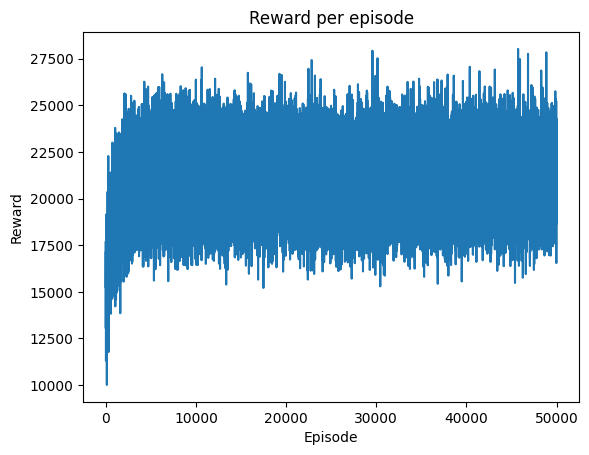

In [7]:
import numpy as np
import gym
from gym import spaces
from tqdm import tqdm
import matplotlib.pyplot as plt

def winprob(a):
    return 1/(1+np.exp(-3+3*a))

def stateTransition(s, win, lead, distance): 
    if win:
        return lead + 2 * distance
    return max(s - 1, 0)

def update_w(w):
    step_sizes = np.array([1, 3, 5])
    probabilities = np.array([0.5, 0.3, 0.2])
    step_size = np.random.choice(step_sizes, p=probabilities)

    if np.random.rand() < abs(w - 100) / 100.0:
        return max(w - step_size, 50) if w > 100 else min(w + step_size, 200)
    else:
        return min(w + step_size, 200) if w > 100 else max(w - step_size, 50)

def find_closest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

class ShippingEnv(gym.Env):
    def __init__(self):
        super(ShippingEnv, self).__init__()

        self.lead = 15
        self.distance = 20
        self.w_values = np.arange(50, 200)
        self.w = np.random.choice(self.w_values)
        self.T = 1000
        self.Arrivalprob = 0.3
        self.actions = np.linspace(0.5, 2, 20)

        self.observation_space = spaces.MultiDiscrete([self.lead + 2 * self.distance + 1, len(self.w_values)])
        self.action_space = spaces.Discrete(len(self.actions))

        self.state = (np.random.randint(0, self.observation_space.nvec[0]), np.random.choice(self.observation_space.nvec[1]))
        self.time = 0

    def step(self, action):
        assert self.action_space.contains(action)

        self.time += 1

        offer_received = np.random.rand() < self.Arrivalprob
        win = np.random.rand() < winprob(self.actions[action])

        # Update w
        self.w = update_w(self.w)
        self.w = find_closest(self.w_values, self.w)
        w_index = np.where(self.w_values == self.w)[0][0]

        # If an offer is received, and the agent accepts it (action > 0), calculate reward and update state
        if offer_received and action > 0:
            self.state = (stateTransition(self.state[0], win, self.lead, self.distance), w_index)
            reward = win * self.actions[action] * self.w
        else:
            self.state = (max(self.state[0] - 1, 0), w_index)
            reward = 0

        done = self.time == self.T

        return np.array(self.state), reward, done, {}

    def reset(self):
        self.state = (np.random.randint(0, self.observation_space.nvec[0]), np.random.choice(self.observation_space.nvec[1]))
        self.time = 0
        return np.array(self.state)

# Define Q-Learning parameters
num_episodes = 50000
max_steps_per_episode = 1000
learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

# Initialize the environment
env = ShippingEnv()

# Initialize the Q-table
q_table = np.zeros((env.observation_space.nvec[0], env.observation_space.nvec[1], env.action_space.n))

# List to hold all rewards
rewards_all_episodes = []

# Q-Learning algorithm
for episode in tqdm(range(num_episodes)):
    state = env.reset()

    done = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode): 

        # Exploration-exploitation trade-off
        exploration_rate_threshold = np.random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state[0], state[1], :]) 
        else:
            action = np.random.choice(env.action_space.n) 

        new_state, reward, done, info = env.step(action)

        # Update Q-table for Q(s,a)
        q_table[state[0], state[1], action] = q_table[state[0], state[1], action] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * np.max(q_table[new_state[0], new_state[1], :]))

        state = new_state
        rewards_current_episode += reward 

        if done == True: 
            break

    # Exploration rate decay
    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
 
    rewards_all_episodes.append(rewards_current_episode)

# Calculate and print the average reward per thousand episodes
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000
print("********Average reward per thousand episodes********\n")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

# Visualize the reward
plt.plot(rewards_all_episodes)
plt.title('Reward per episode')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()


# 2 Vessels

100%|██████████| 50000/50000 [51:28<00:00, 16.19it/s]


********Average reward per thousand episodes********

1000 :  10042.52431578947
2000 :  11243.513026315804
3000 :  11776.598578947362
4000 :  12214.315368421063
5000 :  12484.928789473699
6000 :  12665.00018421052
7000 :  12712.099052631562
8000 :  12638.87684210527
9000 :  12763.024526315785
10000 :  12673.837684210519
11000 :  12719.806815789489
12000 :  12841.775184210546
13000 :  12705.232578947354
14000 :  12631.70468421055
15000 :  12536.211210526302
16000 :  12878.304815789481
17000 :  12768.26510526317
18000 :  12734.951394736843
19000 :  12825.75084210527
20000 :  12650.939000000002
21000 :  12692.667315789493
22000 :  12670.257500000002
23000 :  12667.473078947389
24000 :  12569.27242105264
25000 :  12815.60460526316
26000 :  12943.669763157897
27000 :  12552.905289473678
28000 :  12508.466973684206
29000 :  12658.659105263167
30000 :  12798.240894736853
31000 :  12784.807421052643
32000 :  12813.871789473695
33000 :  12816.971473684205
34000 :  12741.360736842093
35000 :  12

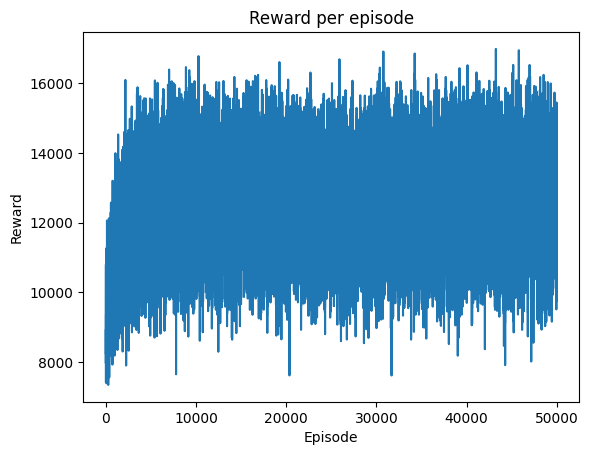

In [8]:
import numpy as np
import gym
from gym import spaces
from tqdm import tqdm
import matplotlib.pyplot as plt

def winprob(a):
    return 1/(1+np.exp(-3+3*a))

def stateTransition(s, win, lead, distance): 
    if win:
        return lead + 2 * distance
    return max(s - 1, 0)

def update_w(w):
    step_sizes = np.array([1, 3])
    probabilities = np.array([0.5, 0.5])
    step_size = np.random.choice(step_sizes, p=probabilities)

    if np.random.rand() < abs(w - 100) / 100.0:
        return max(w - step_size, 90) if w > 100 else min(w + step_size, 110)
    else:
        return min(w + step_size, 100) if w > 100 else max(w - step_size, 90)

def find_closest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

class ShippingEnv(gym.Env):
    def __init__(self):
        super(ShippingEnv, self).__init__()

        self.lead = 15
        self.distance = 20
        self.w_values = np.arange(90, 110)
        self.w = np.random.choice(self.w_values)
        self.T = 1000
        self.Arrivalprob = 0.3
        self.actions = np.linspace(0.5, 2, 20)

        self.observation_space = spaces.MultiDiscrete([self.lead + 2 * self.distance + 1, self.lead + 2 * self.distance + 1, len(self.w_values)])
        self.action_space = spaces.Discrete(len(self.actions))

        self.state = (np.random.randint(0, self.observation_space.nvec[0]), np.random.randint(0, self.observation_space.nvec[1]), np.random.choice(self.observation_space.nvec[2]))
        self.time = 0

    def step(self, action):
        assert self.action_space.contains(action)

        self.time += 1

        offer_received = np.random.rand() < self.Arrivalprob
        win = np.random.rand() < winprob(self.actions[action])

        # Update w
        self.w = update_w(self.w)
        self.w = find_closest(self.w_values, self.w)
        w_index = np.where(self.w_values == self.w)[0][0]

        # If an offer is received, and the agent accepts it (action > 0), calculate reward and update state
        if offer_received and action > 0:
            self.state = (stateTransition(self.state[0], win, self.lead, self.distance), stateTransition(self.state[1], win, self.lead, self.distance), w_index)
            reward = win * self.actions[action] * self.w
        else:
            self.state = (max(self.state[0] - 1, 0), max(self.state[1] - 1, 0), w_index)
            reward = 0

        done = self.time == self.T

        return np.array(self.state), reward, done, {}

    def reset(self):
        self.state = (np.random.randint(0, self.observation_space.nvec[0]), np.random.randint(0, self.observation_space.nvec[1]), np.random.choice(self.observation_space.nvec[2]))
        self.time = 0
        return np.array(self.state)


# Define Q-Learning parameters
num_episodes = 50000
max_steps_per_episode = 1000
learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

# Initialize the environment
env = ShippingEnv()

# Initialize the Q-table
q_table = np.zeros((env.observation_space.nvec[0], env.observation_space.nvec[1], env.action_space.n))

# List to hold all rewards
rewards_all_episodes = []

# Q-Learning algorithm
for episode in tqdm(range(num_episodes)):
    state = env.reset()

    done = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode): 

        # Exploration-exploitation trade-off
        exploration_rate_threshold = np.random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state[0], state[1], :]) 
        else:
            action = np.random.choice(env.action_space.n) 

        new_state, reward, done, info = env.step(action)

        # Update Q-table for Q(s,a)
        q_table[state[0], state[1], action] = q_table[state[0], state[1], action] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * np.max(q_table[new_state[0], new_state[1], :]))

        state = new_state
        rewards_current_episode += reward 

        if done == True: 
            break

    # Exploration rate decay
    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
 
    rewards_all_episodes.append(rewards_current_episode)

# Calculate and print the average reward per thousand episodes
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000
print("********Average reward per thousand episodes********\n")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

# Visualize the reward
plt.plot(rewards_all_episodes)
plt.title('Reward per episode')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

# 2 Ports

100%|██████████| 50000/50000 [52:58<00:00, 15.73it/s]


********Average reward per thousand episodes********

1000 :  12785.709894736845
2000 :  16256.812368421048
3000 :  17460.14850000001
4000 :  17922.477263157893
5000 :  18160.995921052643
6000 :  18183.893447368406
7000 :  18254.857631578947
8000 :  18135.75436842106
9000 :  18167.56163157898
10000 :  18226.11328947367
11000 :  18135.37084210526
12000 :  18171.826131578935
13000 :  18197.913736842114
14000 :  18189.93889473679
15000 :  18143.928236842094
16000 :  18134.896210526327
17000 :  18232.83799999998
18000 :  18217.912789473703
19000 :  18199.51360526314
20000 :  18206.962368421064
21000 :  18311.26515789474
22000 :  18278.192184210515
23000 :  18189.66084210527
24000 :  18211.619578947386
25000 :  18208.203000000012
26000 :  18192.729447368438
27000 :  18320.85294736841
28000 :  18303.07271052632
29000 :  18386.252894736837
30000 :  18427.695131578967
31000 :  18438.487342105254
32000 :  18457.10902631577
33000 :  18516.74873684211
34000 :  18521.677763157906
35000 :  18396.60

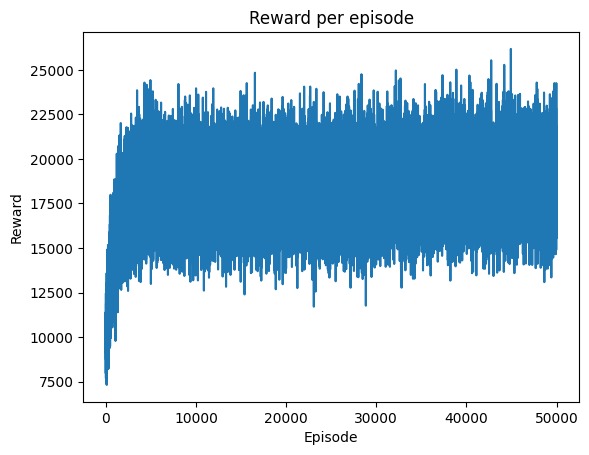

In [9]:
import numpy as np
import gym
from gym import spaces
from tqdm import tqdm
import matplotlib.pyplot as plt

def winprob(a, d):
    return 1/(1+np.exp(-3+3*a*(d+1)))

def stateTransition(s, win, lead, distance, d): 
    if win:
        return lead + 2 * (d+1) * distance
    return max(s - 1, 0)

def update_w(w):
    step_sizes = np.array([1, 3, 5])
    probabilities = np.array([0.5, 0.3, 0.2])
    step_size = np.random.choice(step_sizes, p=probabilities)

    if np.random.rand() < abs(w - 100) / 100.0:
        return max(w - step_size, 50) if w > 100 else min(w + step_size, 200)
    else:
        return min(w + step_size, 200) if w > 100 else max(w - step_size, 50)

def find_closest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

class ShippingEnv(gym.Env):
    def __init__(self):
        super(ShippingEnv, self).__init__()

        self.lead = 15
        self.distance = 20
        self.w_values = np.arange(50, 200)
        self.w = np.random.choice(self.w_values)
        self.T = 1000
        self.Arrivalprob = 0.3
        self.offer_values = np.linspace(0.5, 2, 20)
        self.destinations = np.array([0, 1])
        self.actions = [(a, d) for a in self.offer_values for d in self.destinations]

        self.observation_space = spaces.MultiDiscrete([self.lead + 2 * 2 * self.distance + 1, len(self.w_values)])
        self.action_space = spaces.Discrete(len(self.actions))

        self.state = (np.random.randint(0, self.observation_space.nvec[0]), np.random.choice(self.observation_space.nvec[1]))
        self.time = 0

    def step(self, action):
        assert self.action_space.contains(action)

        self.time += 1

        offer_received = np.random.rand() < self.Arrivalprob
        win = np.random.rand() < winprob(self.actions[action][0], self.actions[action][1])

        # Update w
        self.w = update_w(self.w)
        self.w = find_closest(self.w_values, self.w)
        w_index = np.where(self.w_values == self.w)[0][0]

        # If an offer is received, and the agent accepts it (action > 0), calculate reward and update state
        if offer_received and action > 0:
            self.state = (stateTransition(self.state[0], win, self.lead, self.distance, self.actions[action][1]), w_index)
            reward = win * self.actions[action][0] * (self.actions[action][1] + 1) * self.w
        else:
            self.state = (max(self.state[0] - 1, 0), w_index)
            reward = 0

        done = self.time == self.T

        return np.array(self.state), reward, done, {}

    def reset(self):
        self.state = (np.random.randint(0, self.observation_space.nvec[0]), np.random.choice(self.observation_space.nvec[1]))
        self.time = 0
        return np.array(self.state)


# Define Q-Learning parameters
num_episodes = 50000
max_steps_per_episode = 1000
learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

# Initialize the environment
env = ShippingEnv()

# Initialize the Q-table
q_table = np.zeros((env.observation_space.nvec[0], env.observation_space.nvec[1], env.action_space.n))

# List to hold all rewards
rewards_all_episodes = []

# Q-Learning algorithm
for episode in tqdm(range(num_episodes)):
    state = env.reset()

    done = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode): 

        # Exploration-exploitation trade-off
        exploration_rate_threshold = np.random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state[0], state[1], :]) 
        else:
            action = np.random.choice(env.action_space.n) 

        new_state, reward, done, info = env.step(action)

        # Update Q-table for Q(s,a)
        q_table[state[0], state[1], action] = q_table[state[0], state[1], action] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * np.max(q_table[new_state[0], new_state[1], :]))

        state = new_state
        rewards_current_episode += reward 

        if done == True: 
            break

    # Exploration rate decay
    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
 
    rewards_all_episodes.append(rewards_current_episode)

# Calculate and print the average reward per thousand episodes
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000
print("********Average reward per thousand episodes********\n")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

# Visualize the reward
plt.plot(rewards_all_episodes)
plt.title('Reward per episode')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

# Full Code

100%|██████████| 50000/50000 [55:50<00:00, 14.92it/s]  


********Average reward per thousand episodes********

1000 :  12790.554605263153
2000 :  16040.193236842118
3000 :  17183.92626315789
4000 :  17743.740921052628
5000 :  17752.13855263158
6000 :  17897.004078947364
7000 :  17892.230157894723
8000 :  17870.30573684209
9000 :  17992.778236842078
10000 :  17861.81731578945
11000 :  18004.10307894735
12000 :  17942.564973684202
13000 :  17927.283894736836
14000 :  17950.34957894739
15000 :  17959.581131578932
16000 :  17884.868184210514
17000 :  17908.23999999999
18000 :  17893.948447368417
19000 :  17853.355578947372
20000 :  17931.312263157874
21000 :  17850.600236842143
22000 :  18043.59242105263
23000 :  18045.624394736835
24000 :  18089.355894736833
25000 :  18059.673921052643
26000 :  18111.57676315789
27000 :  18078.31813157896
28000 :  18218.573499999977
29000 :  18216.774289473695
30000 :  18221.43031578947
31000 :  18249.63321052631
32000 :  18393.57718421051
33000 :  18295.111263157887
34000 :  18353.02502631579
35000 :  18459.34

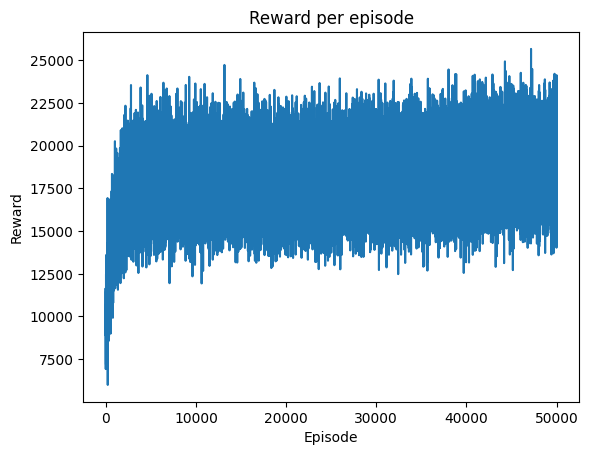

In [10]:
import numpy as np
import gym
from gym import spaces
from tqdm import tqdm
import matplotlib.pyplot as plt

def winprob(a, d):
    return 1/(1+np.exp(-3+3*a*(d+1)))

def stateTransition(s, win, lead, distance, d): 
    if win:
        return lead + 2 * (d+1) * distance
    return max(s - 1, 0)

def update_w(w):
    step_sizes = np.array([1, 3, 5])
    probabilities = np.array([0.5, 0.3, 0.2])
    step_size = np.random.choice(step_sizes, p=probabilities)

    if np.random.rand() < abs(w - 100) / 100.0:
        return max(w - step_size, 50) if w > 100 else min(w + step_size, 200)
    else:
        return min(w + step_size, 200) if w > 100 else max(w - step_size, 50)

def find_closest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

class ShippingEnv(gym.Env):
    def __init__(self):
        super(ShippingEnv, self).__init__()

        self.lead = 15
        self.distance = 20
        self.w_values = np.arange(50, 200)
        self.w = np.random.choice(self.w_values)
        self.T = 1000
        self.Arrivalprob = 0.3
        self.offer_values = np.linspace(0.5, 2, 20)
        self.destinations = np.array([0, 1])
        self.actions = [(a, d) for a in self.offer_values for d in self.destinations]

        self.observation_space = spaces.MultiDiscrete([self.lead + 2 * 2 * self.distance + 1, len(self.w_values)])
        self.action_space = spaces.Discrete(len(self.actions))

        self.state = (np.random.randint(0, self.observation_space.nvec[0]), np.random.choice(self.observation_space.nvec[1]))
        self.time = 0

    def step(self, action):
        assert self.action_space.contains(action)

        self.time += 1

        offer_received = np.random.rand() < self.Arrivalprob
        win = np.random.rand() < winprob(self.actions[action][0], self.actions[action][1])

        # Update w
        self.w = update_w(self.w)
        self.w = find_closest(self.w_values, self.w)
        w_index = np.where(self.w_values == self.w)[0][0]

        # If an offer is received, and the agent accepts it (action > 0), calculate reward and update state
        if offer_received and action > 0:
            self.state = (stateTransition(self.state[0], win, self.lead, self.distance, self.actions[action][1]), w_index)
            reward = win * self.actions[action][0] * (self.actions[action][1] + 1) * self.w
        else:
            self.state = (max(self.state[0] - 1, 0), w_index)
            reward = 0

        done = self.time == self.T

        return np.array(self.state), reward, done, {}

    def reset(self):
        self.state = (np.random.randint(0, self.observation_space.nvec[0]), np.random.choice(self.observation_space.nvec[1]))
        self.time = 0
        return np.array(self.state)


# Define Q-Learning parameters
num_episodes = 50000
max_steps_per_episode = 1000
learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

# Initialize the environment
env = ShippingEnv()

# Initialize the Q-table
q_table = np.zeros((env.observation_space.nvec[0], env.observation_space.nvec[1], env.action_space.n))

# List to hold all rewards
rewards_all_episodes = []

# Q-Learning algorithm
for episode in tqdm(range(num_episodes)):
    state = env.reset()

    done = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode): 

        # Exploration-exploitation trade-off
        exploration_rate_threshold = np.random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state[0], state[1], :]) 
        else:
            action = np.random.choice(env.action_space.n) 

        new_state, reward, done, info = env.step(action)

        # Update Q-table for Q(s,a)
        q_table[state[0], state[1], action] = q_table[state[0], state[1], action] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * np.max(q_table[new_state[0], new_state[1], :]))

        state = new_state
        rewards_current_episode += reward 

        if done == True: 
            break

    # Exploration rate decay
    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
 
    rewards_all_episodes.append(rewards_current_episode)

# Calculate and print the average reward per thousand episodes
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000
print("********Average reward per thousand episodes********\n")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

# Visualize the reward
plt.plot(rewards_all_episodes)
plt.title('Reward per episode')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

# Q1,2

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from tqdm import tqdm

# Functions and environment definition
def winprob(a):
    return 1 / (1 + np.exp(-3 + 3 * a))

def stateTransition(s, win, lead, distance): 
    if win:
        return lead + 2 * distance
    return max(s - 1, 0)

class ShippingEnv(gym.Env):
    def __init__(self):
        super(ShippingEnv, self).__init__()
        self.lead = 15
        self.distance = 20
        self.w = 100
        self.T = 1000
        self.Arrivalprob = 0.3
        self.actions = np.linspace(0.85, 0.95, 16)
        self.observation_space = gym.spaces.Discrete(self.lead + 2 * self.distance + 1)
        self.action_space = gym.spaces.Discrete(len(self.actions))
        self.state = (np.random.randint(0, self.observation_space.n), self.w)
        self.time = 0

    def wScenaria(self, w):
        upprob = 1 / (1 + np.exp(-3 + 3 * w / 100))
        downprob = 1 - upprob
        scenaria = [(max(min(w + 15, 200), 50), upprob / 2),
                    (max(min(w + 5, 200), 50), upprob / 2),
                    (max(min(w - 5, 200), 50), downprob / 2),
                    (max(min(w - 15, 200), 50), downprob / 2)]
        return scenaria

    def step(self, action):
        s, w = self.state
        self.time += 1
        offer_received = np.random.rand() < self.Arrivalprob
        win = np.random.rand() < winprob(self.actions[action])
        if offer_received and action > 0:
            s = stateTransition(s, win, self.lead, self.distance)
            reward = win * self.actions[action] * w
        else:
            s = max(s - 1, 0)
            reward = 0
        new_w = np.random.choice([scen[0] for scen in self.wScenaria(w)], p=[scen[1] for scen in self.wScenaria(w)])
        self.state = (s, new_w)
        done = self.time == self.T
        return self.state, reward, done, {}

    def reset(self):
        self.state = (np.random.randint(0, self.observation_space.n), self.w)
        self.time = 0
        return self.state

# Q-Learning parameters
num_episodes = 50000
max_steps_per_episode = 1000
learning_rate = 0.1
discount_rate = 0.99
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

# Initialize the environment
env = ShippingEnv()
q_table = np.zeros((env.observation_space.n, env.action_space.n))
rewards_all_episodes = []

for episode in tqdm(range(num_episodes)):
    state = env.reset()
    s, w = state
    done = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode): 
        exploration_rate_threshold = np.random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[s,:]) 
        else:
            action = np.random.choice(env.action_space.n) 
        new_state, reward, done, _ = env.step(action)
        new_s, new_w = new_state
        q_table[s, action] = q_table[s, action] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * np.max(q_table[new_s, :]))
        s, w = new_s, new_w
        rewards_current_episode += reward 
        if done: 
            break
    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    rewards_all_episodes.append(rewards_current_episode)


100%|██████████| 50000/50000 [49:04<00:00, 16.98it/s]  


ValueError: Must pass 2-d input. shape=(96, 51, 16)

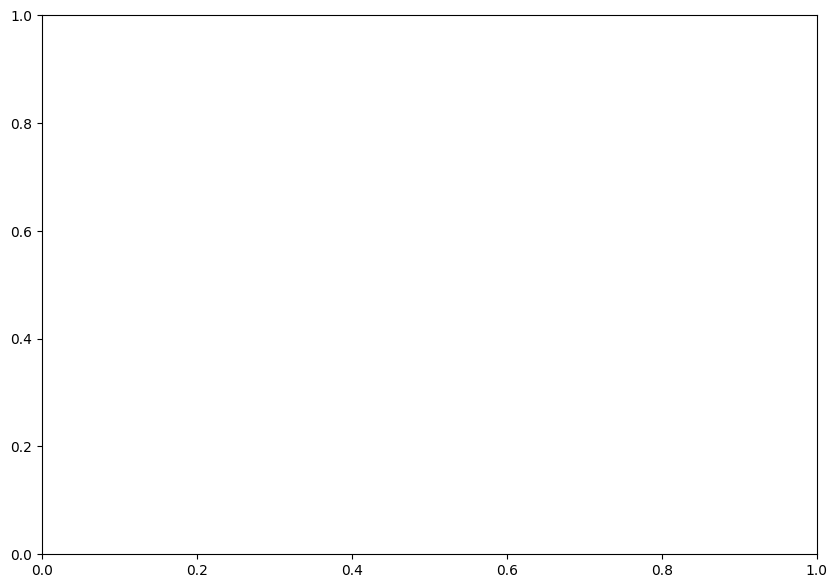

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've trained a Q-table named 'q_table' for the original problem

# Extract optimal actions for each combination of state and w
optimal_actions = np.argmax(q_table, axis=2)

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(10, 7))

sns.heatmap(optimal_actions, ax=ax, cmap="YlGnBu", cbar_kws={'label': 'Optimal Action Index'})
ax.set_title('Optimal Action')
ax.set_xlabel('w values')
ax.set_ylabel('State')
ax.set_xticks(np.arange(len(w_values)))
ax.set_xticklabels(w_values, rotation=90)

plt.tight_layout()
plt.show()


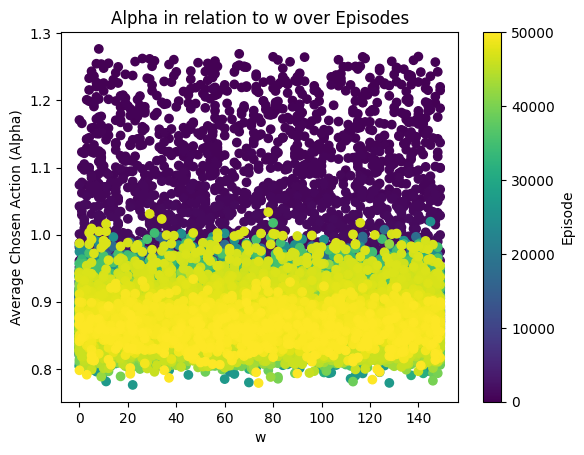

# Q3

In [13]:
import numpy as np
import gym
from tqdm import tqdm
import matplotlib.pyplot as plt

# Constants
PORT_A = 0
PORT_B = 1
DISTANCE_A = 20
DISTANCE_B = 40

# Functions and environment definition
def winprob(a):
    return 1 / (1 + np.exp(-3 + 3 * a))

class ShippingEnv(gym.Env):
    def __init__(self):
        super(ShippingEnv, self).__init__()

        self.lead = 15
        self.Arrivalprob = 0.3
        self.T = 1000
        self.actions = np.linspace(0.85, 0.95, 16)
        self.w_values = list(np.arange(50, 205, 5)) + list(np.arange(210, 405, 10))
        self.observation_space = gym.spaces.Tuple((gym.spaces.Discrete(self.lead + 2 * DISTANCE_B + 1),
                                                   gym.spaces.Discrete(len(self.w_values)),
                                                   gym.spaces.Discrete(2)))
        self.action_space = gym.spaces.Discrete(len(self.actions))
        self.state = (np.random.randint(0, self.observation_space[0].n), np.random.choice(range(len(self.w_values))), np.random.choice([PORT_A, PORT_B]))
        self.time = 0

    def stateTransition(self, s, win, w, p):
        if win:
            if p == PORT_A:
                return self.lead + 2 * DISTANCE_A
            else:
                return self.lead + 2 * DISTANCE_B
        else:
            return max(s-1, 0)

    def wScenaria(self, w_index, p):
        w = self.w_values[w_index]
        if p == PORT_A:
            upprob = 1 / (1 + np.exp(-3 + 3 * w / 100))
            downprob = 1 - upprob
            return [
                (max(min(w + 15, 200), 50), upprob / 2),
                (max(min(w + 5, 200), 50), upprob / 2),
                (max(min(w - 5, 200), 50), downprob / 2),
                (max(min(w - 15, 200), 50), downprob / 2)
            ]
        else:  # PORT_B
            w = 2 * w
            upprob = 1 / (1 + np.exp(-3 + 3 * w / 200))  # Adjusted for 2*w
            downprob = 1 - upprob
            return [
                (max(min(w + 30, 400), 100), upprob / 2),
                (max(min(w + 10, 400), 100), upprob / 2),
                (max(min(w - 10, 400), 100), downprob / 2),
                (max(min(w - 30, 400), 100), downprob / 2)
            ]

    def step(self, action):
        s, w_index, p = self.state
        w = self.w_values[w_index]
        self.time += 1
        offer_received = np.random.rand() < self.Arrivalprob
        win = np.random.rand() < winprob(self.actions[action])
        if offer_received and action > 0:
            s = self.stateTransition(s, win, w, p)
            reward = win * self.actions[action] * w
        else:
            s = max(s - 1, 0)
            reward = 0
        new_w_index = np.random.choice([i for i, scen in enumerate(self.wScenaria(w_index, p))], p=[scen[1] for scen in self.wScenaria(w_index, p)])
        self.state = (s, new_w_index, p)
        done = self.time == self.T
        return self.state, reward, done, {}

    def reset(self):
        self.state = (np.random.randint(0, self.observation_space[0].n), np.random.choice(range(len(self.w_values))), np.random.choice([PORT_A, PORT_B]))
        self.time = 0
        return self.state

# Q-Learning parameters
num_episodes = 50000
max_steps_per_episode = 1000
learning_rate = 0.1
discount_rate = 0.99
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

# Initialize the environment
env = ShippingEnv()
state_dim = (env.observation_space[0].n, len(env.w_values), 2)
q_table = np.zeros(state_dim + (env.action_space.n,))
rewards_all_episodes = []

# Training loop
for episode in tqdm(range(num_episodes)):
    state = env.reset()
    done = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode):
        exploration_rate_threshold = np.random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state])
        else:
            action = np.random.choice(env.action_space.n)
        new_state, reward, done, _ = env.step(action)
        q_table[state + (action,)] = q_table[state + (action,)] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * np.max(q_table[new_state]))
        state = new_state
        rewards_current_episode += reward
        if done:
            break

    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    rewards_all_episodes.append(rewards_current_episode)

# Plotting the heatmaps

import seaborn as sns
import matplotlib.pyplot as plt

# Extract optimal actions for each combination of state and w for both ports
optimal_actions_A = np.argmax(q_table[:, :, PORT_A, :], axis=2)
optimal_actions_B = np.argmax(q_table[:, :, PORT_B, :], axis=2)

# Plotting the heatmaps
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

sns.heatmap(optimal_actions_A, ax=ax[0], cmap="YlGnBu", cbar_kws={'label': 'Optimal Action Index'})
ax[0].set_title('Optimal Action for PORT A')
ax[0].set_xlabel('w values')
ax[0].set_ylabel('State')
ax[0].set_xticks(np.arange(len(env.w_values)))
ax[0].set_xticklabels(env.w_values, rotation=90)

sns.heatmap(optimal_actions_B, ax=ax[1], cmap="YlGnBu", cbar_kws={'label': 'Optimal Action Index'})
ax[1].set_title('Optimal Action for PORT B')
ax[1].set_xlabel('w values')
ax[1].set_ylabel('State')
ax[1].set_xticks(np.arange(len(env.w_values)))
ax[1].set_xticklabels(env.w_values, rotation=90)

plt.tight_layout()
plt.show()



  5%|▍         | 2382/50000 [05:36<1:52:15,  7.07it/s]


KeyboardInterrupt: 

# Q4

In [14]:
import numpy as np
import gym
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# Constants and Port definitions
PORT_A = 0
PORT_B = 1
DISTANCE_A = 20
DISTANCE_B = 40
Arrivalprob = {PORT_A: 0.3, PORT_B: 0.15}

# Winning probability function
def winprob(a):
    return 1 / (1 + np.exp(-3 + 3 * a))

# Define the Gym environment
class ShippingEnv(gym.Env):
    def __init__(self):
        super(ShippingEnv, self).__init__()

        self.lead = 15
        self.T = 1000
        self.actions = np.linspace(0.85, 0.95, 16)
        self.w_values = list(np.arange(50, 205, 5)) + list(np.arange(210, 405, 10))
        self.observation_space = gym.spaces.Tuple((gym.spaces.Discrete(self.lead + 2 * DISTANCE_B + 1),
                                                   gym.spaces.Discrete(len(self.w_values)), 
                                                   gym.spaces.Discrete(2))) # 2 for PORT_A and PORT_B
        self.action_space = gym.spaces.Discrete(len(self.actions))
        self.state = (np.random.randint(0, self.observation_space[0].n), self.w_values.index(np.random.choice(self.w_values)), np.random.choice([PORT_A, PORT_B]))
        self.time = 0

    def stateTransition(self, s, win, w, p): 
        if win:
            if p == PORT_A:
                return self.lead + 2 * DISTANCE_A
            else:
                return self.lead + 2 * DISTANCE_B
        else:
            return max(s - 1, 0)

    def wScenaria(self, w, p):
        w_value = self.w_values[w] # Get w value from index
        if p == PORT_A:
            upprob = 1 / (1 + np.exp(-3 + 3 * w_value / 100))
            downprob = 1 - upprob
            return [
                (self.w_values.index(max(min(w_value + 15, 200), 50)), upprob / 3),
                (self.w_values.index(max(min(w_value + 5, 200), 50)), upprob * 2 / 3),
                (self.w_values.index(max(min(w_value - 5, 200), 50)), downprob * 2 / 3),
                (self.w_values.index(max(min(w_value - 15, 200), 50)), downprob / 3)
            ]
        else:  # PORT B
            w_value = 2 * w_value
            upprob = 1 / (1 + np.exp(-3 + 3 * w_value / 200))  # Adjusted for 2*w
            downprob = 1 - upprob
            return [
                (self.w_values.index(max(min(w_value + 30, 400), 100)), upprob / 3),
                (self.w_values.index(max(min(w_value + 10, 400), 100)), upprob * 2 / 3),
                (self.w_values.index(max(min(w_value - 10, 400), 100)), downprob * 2 / 3),
                (self.w_values.index(max(min(w_value - 30, 400), 100)), downprob / 3)
            ]

    def step(self, action):
        s, w, p = self.state
        self.time += 1
        offer_received = np.random.rand() < Arrivalprob[p]
        win = np.random.rand() < winprob(self.actions[action])
        if offer_received and action > 0:
            s = self.stateTransition(s, win, w, p)
            reward = win * self.actions[action] * self.w_values[w]
        else:
            s = max(s - 1, 0)
            reward = 0
        new_w, _ = max(self.wScenaria(w, p), key=lambda x: x[1])
        self.state = (s, new_w, p)
        done = self.time == self.T
        return self.state, reward, done, {}

    def reset(self):
        self.state = (np.random.randint(0, self.observation_space[0].n), self.w_values.index(np.random.choice(self.w_values)), np.random.choice([PORT_A, PORT_B]))
        self.time = 0
        return self.state

# Q-Learning parameters
num_episodes = 50000
max_steps_per_episode = 1000
learning_rate = 0.1
discount_rate = 0.99
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

# Initialize the environment
env = ShippingEnv()
state_dim = (env.observation_space[0].n, len(env.w_values), 2)
q_table = np.zeros(state_dim + (env.action_space.n,))
rewards_all_episodes = []

for episode in tqdm(range(num_episodes)):
    state = env.reset()
    done = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode): 
        exploration_rate_threshold = np.random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state]) 
        else:
            action = np.random.choice(env.action_space.n) 
        new_state, reward, done, _ = env.step(action)
        q_table[state + (action,)] = q_table[state + (action,)] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * np.max(q_table[new_state]))
        state = new_state
        rewards_current_episode += reward 
        if done: 
            break
    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    rewards_all_episodes.append(rewards_current_episode)

# Heatmap visualization
optimal_actions_A = np.argmax(q_table[:, :, PORT_A, :], axis=2)
optimal_actions_B = np.argmax(q_table[:, :, PORT_B, :], axis=2)

fig, ax = plt.subplots(1, 2, figsize=(15, 7))
sns.heatmap(optimal_actions_A, ax=ax[0], cmap="YlGnBu", cbar_kws={'label': 'Optimal Action Index'})
ax[0].set_title('Optimal Action for PORT A')
ax[0].set_xlabel('w values')
ax[0].set_ylabel('State')
ax[0].set_xticks(np.arange(len(env.w_values)))
ax[0].set_xticklabels(env.w_values, rotation=90)

sns.heatmap(optimal_actions_B, ax=ax[1], cmap="YlGnBu", cbar_kws={'label': 'Optimal Action Index'})
ax[1].set_title('Optimal Action for PORT B')
ax[1].set_xlabel('w values')
ax[1].set_ylabel('State')
ax[1].set_xticks(np.arange(len(env.w_values)))
ax[1].set_xticklabels(env.w_values, rotation=90)

plt.tight_layout()
plt.show()


  0%|          | 129/50000 [00:07<49:25, 16.82it/s]


KeyboardInterrupt: 

# Q5

In [10]:
import numpy as np
import gym
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# Constants and Port definitions
PORT_A = 0
PORT_B = 1
DISTANCE_A = 20
DISTANCE_B = 40
Arrivalprob = {PORT_A: 0.3, PORT_B: 0.15}
LEAD_A = 5
LEAD_B = 15
lead_times = {PORT_A: LEAD_A, PORT_B: LEAD_B}

# Winning probability function
def winprob(a):
    return 1 / (1 + np.exp(-3 + 3 * a))

# Define the Gym environment
class ShippingEnv(gym.Env):
    def __init__(self):
        super(ShippingEnv, self).__init__()

        self.T = 1000
        self.actions = np.linspace(0.85, 0.95, 16)
        self.w_values = list(np.arange(50, 205, 5)) + list(np.arange(210, 405, 10))
        self.observation_space = gym.spaces.Tuple((gym.spaces.Discrete(max(lead_times.values()) + 2 * DISTANCE_B + 1),
                                                   gym.spaces.Discrete(len(self.w_values)), 
                                                   gym.spaces.Discrete(2))) # 2 for PORT_A and PORT_B
        self.action_space = gym.spaces.Discrete(len(self.actions))
        self.state = (np.random.randint(0, self.observation_space[0].n), np.random.choice(self.w_values), np.random.choice([PORT_A, PORT_B]))
        self.time = 0

    def stateTransition(self, s, win, w, p): 
        if win:
            return lead_times[p] + (2 * DISTANCE_A if p == PORT_A else 2 * DISTANCE_B)
        else:
            return max(s - 1, 0)

    def wScenaria(self, w, p):
        if p == PORT_A:
            upprob = 1 / (1 + np.exp(-3 + 3 * w / 100))
            downprob = 1 - upprob
            return [
                (max(min(w + 15, 200), 50), upprob / 3),
                (max(min(w + 5, 200), 50), upprob * 2 / 3),
                (max(min(w - 5, 200), 50), downprob * 2 / 3),
                (max(min(w - 15, 200), 50), downprob / 3)
            ]
        else:  # PORT B
            w = 2 * w
            upprob = 1 / (1 + np.exp(-3 + 3 * w / 200))  # Adjusted for 2*w
            downprob = 1 - upprob
            return [
                (max(min(w + 30, 400), 100), upprob / 3),
                (max(min(w + 10, 400), 100), upprob * 2 / 3),
                (max(min(w - 10, 400), 100), downprob * 2 / 3),
                (max(min(w - 30, 400), 100), downprob / 3)
            ]

    def step(self, action):
        s, w, p = self.state
        self.time += 1
        offer_received = np.random.rand() < Arrivalprob[p]
        win = np.random.rand() < winprob(self.actions[action])
        if offer_received and action > 0:
            s = self.stateTransition(s, win, w, p)
            reward = win * self.actions[action] * w
        else:
            s = max(s - 1, 0)
            reward = 0
        new_w = np.random.choice([scen[0] for scen in self.wScenaria(w, p)], p=[scen[1] for scen in self.wScenaria(w, p)])
        self.state = (s, new_w, p)
        done = self.time == self.T
        return self.state, reward, done, {}

    def reset(self):
        self.state = (np.random.randint(0, self.observation_space[0].n), np.random.choice(self.w_values), np.random.choice([PORT_A, PORT_B]))
        self.time = 0
        return self.state

# Q-Learning parameters
num_episodes = 50000
max_steps_per_episode = 1000
learning_rate = 0.1
discount_rate = 0.99
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

# Initialize the environment
env = ShippingEnv()
state_dim = (env.observation_space[0].n, len(env.w_values), 2)
q_table = np.zeros(state_dim + (env.action_space.n,))
rewards_all_episodes = []

# Q-learning loop
for episode in tqdm(range(num_episodes)):
    state = env.reset()
    done = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode): 
        exploration_rate_threshold = np.random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state]) 
        else:
            action = np.random.choice(env.action_space.n) 

        new_state, reward, done, _ = env.step(action)
        q_table[state + (action,)] = q_table[state + (action,)] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * np.max(q_table[new_state]))
        state = new_state
        rewards_current_episode += reward 
        if done: 
            break

    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    rewards_all_episodes.append(rewards_current_episode)

# Heatmap visualization
optimal_actions_A = np.argmax(q_table[:, :, PORT_A, :], axis=2)
optimal_actions_B = np.argmax(q_table[:, :, PORT_B, :], axis=2)

fig, ax = plt.subplots(1, 2, figsize=(15, 7))
sns.heatmap(optimal_actions_A, ax=ax[0], cmap="YlGnBu", cbar_kws={'label': 'Optimal Action Index'})
ax[0].set_title('Optimal Action for PORT A')
ax[0].set_xlabel('w values')
ax[0].set_ylabel('State')
ax[0].set_xticks(np.arange(len(env.w_values)))
ax[0].set_xticklabels(env.w_values, rotation=90)

sns.heatmap(optimal_actions_B, ax=ax[1], cmap="YlGnBu", cbar_kws={'label': 'Optimal Action Index'})
ax[1].set_title('Optimal Action for PORT B')
ax[1].set_xlabel('w values')
ax[1].set_ylabel('State')
ax[1].set_xticks(np.arange(len(env.w_values)))
ax[1].set_xticklabels(env.w_values, rotation=90)

plt.tight_layout()
plt.show()


  0%|          | 0/50000 [00:00<?, ?it/s]


IndexError: index 360 is out of bounds for axis 1 with size 51

In [15]:
import numpy as np
import gym
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# Constants and Port definitions
PORT_A = 0
PORT_B = 1
DISTANCE_A = 20
DISTANCE_B = 40
Arrivalprob = {PORT_A: 0.3, PORT_B: 0.15}
LEAD_A = 5
LEAD_B = 15
lead_times = {PORT_A: LEAD_A, PORT_B: LEAD_B}

# Winning probability function
def winprob(a):
    return 1 / (1 + np.exp(-3 + 3 * a))

# Define the Gym environment
class ShippingEnv(gym.Env):
    def __init__(self):
        super(ShippingEnv, self).__init__()

        self.T = 1000
        self.actions = np.linspace(0.85, 0.95, 16)
        self.w_values = list(np.arange(50, 205, 5)) + list(np.arange(210, 405, 10))
        self.observation_space = gym.spaces.Tuple((gym.spaces.Discrete(max(lead_times.values()) + 2 * DISTANCE_B + 1),
                                                   gym.spaces.Discrete(len(self.w_values)), 
                                                   gym.spaces.Discrete(2))) # 2 for PORT_A and PORT_B
        self.action_space = gym.spaces.Discrete(len(self.actions))
        self.state = (np.random.randint(0, self.observation_space[0].n), np.random.choice(len(self.w_values)), np.random.choice([PORT_A, PORT_B]))
        self.time = 0

    def stateTransition(self, s, win, w, p): 
        if win:
            return lead_times[p] + (2 * DISTANCE_A if p == PORT_A else 2 * DISTANCE_B)
        else:
            return max(s - 1, 0)

    def wScenaria(self, w, p):
        if p == PORT_A:
            upprob = 1 / (1 + np.exp(-3 + 3 * w / 100))
            downprob = 1 - upprob
            return [
                (max(min(w + 15, 200), 50), upprob / 3),
                (max(min(w + 5, 200), 50), upprob * 2 / 3),
                (max(min(w - 5, 200), 50), downprob * 2 / 3),
                (max(min(w - 15, 200), 50), downprob / 3)
            ]
        else:  # PORT B
            w = 2 * w
            upprob = 1 / (1 + np.exp(-3 + 3 * w / 200))  # Adjusted for 2*w
            downprob = 1 - upprob
            return [
                (max(min(w + 30, 400), 100), upprob / 3),
                (max(min(w + 10, 400), 100), upprob * 2 / 3),
                (max(min(w - 10, 400), 100), downprob * 2 / 3),
                (max(min(w - 30, 400), 100), downprob / 3)
            ]

    def step(self, action):
        s, w, p = self.state
        self.time += 1
        offer_received = np.random.rand() < Arrivalprob[p]
        win = np.random.rand() < winprob(self.actions[action])
        if offer_received and action > 0:
            s = self.stateTransition(s, win, w, p)
            reward = win * self.actions[action] * w
        else:
            s = max(s - 1, 0)
            reward = 0
        new_w = np.random.choice([scen[0] for scen in self.wScenaria(w, p)], p=[scen[1] for scen in self.wScenaria(w, p)])
        self.state = (s, new_w, p)
        done = self.time == self.T
        return self.state, reward, done, {}

    def reset(self):
        self.state = (np.random.randint(0, self.observation_space[0].n), np.random.choice(self.w_values), np.random.choice([PORT_A, PORT_B]))
        self.time = 0
        return self.state

# Q-Learning parameters
num_episodes = 50000
max_steps_per_episode = 1000
learning_rate = 0.1
discount_rate = 0.99
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

# Initialize the environment
env = ShippingEnv()
state_dim = (env.observation_space[0].n, len(env.w_values), 2)
q_table = np.zeros(state_dim + (env.action_space.n,))
rewards_all_episodes = []

# Q-learning loop
for episode in tqdm(range(num_episodes)):
    state = env.reset()
    done = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode): 
        exploration_rate_threshold = np.random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state]) 
        else:
            action = np.random.choice(env.action_space.n) 

        new_state, reward, done, _ = env.step(action)
        q_table[state + (action,)] = q_table[state + (action,)] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * np.max(q_table[new_state]))
        state = new_state
        rewards_current_episode += reward 
        if done: 
            break

    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    rewards_all_episodes.append(rewards_current_episode)

# Heatmap visualization
optimal_actions_A = np.argmax(q_table[:, :, PORT_A, :], axis=2)
optimal_actions_B = np.argmax(q_table[:, :, PORT_B, :], axis=2)

fig, ax = plt.subplots(1, 2, figsize=(15, 7))
sns.heatmap(optimal_actions_A, ax=ax[0], cmap="YlGnBu", cbar_kws={'label': 'Optimal Action Index'})
ax[0].set_title('Optimal Action for PORT A')
ax[0].set_xlabel('w values')
ax[0].set_ylabel('State')
ax[0].set_xticks(np.arange(len(env.w_values)))
ax[0].set_xticklabels(env.w_values, rotation=90)

sns.heatmap(optimal_actions_B, ax=ax[1], cmap="YlGnBu", cbar_kws={'label': 'Optimal Action Index'})
ax[1].set_title('Optimal Action for PORT B')
ax[1].set_xlabel('w values')
ax[1].set_ylabel('State')
ax[1].set_xticks(np.arange(len(env.w_values)))
ax[1].set_xticklabels(env.w_values, rotation=90)

plt.tight_layout()
plt.show()


  0%|          | 0/50000 [00:00<?, ?it/s]


IndexError: index 80 is out of bounds for axis 1 with size 51